In [7]:
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.models import Model
import keras
import numpy as np
import os
from PIL import Image
from keras.utils import load_img, img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_dataset = tf.keras.utils.image_dataset_from_directory(
  './dataset/',
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=4)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  './dataset/',
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=4)
train_dataset.class_names

Found 210 files belonging to 5 classes.
Using 168 files for training.
Found 210 files belonging to 5 classes.
Using 42 files for validation.


['cocaine', 'crack drug', 'ecstasy drug', 'methamphetamine', 'weed']

Cut off the top layer acting as a classifier

In [9]:
resnet50_imagenet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

Freeze the layers

In [10]:
resnet50_imagenet_model.trainable = False
print(resnet50_imagenet_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [11]:

model = keras.models.Sequential()
model.add(resnet50_imagenet_model)
'''
model.add(tf.keras.layers.Dense(units=30, activation=tf.keras.activations.relu))
'''
#model.add(tf.keras.layers.Activation(activation=tf.keras.activations.softmax))
model.add(tf.keras.layers.MaxPooling2D(strides=2, pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=30, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=5, activation=tf.keras.activations.softmax))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 30)                552990    
                                                                 
 dense_3 (Dense)             (None, 5)                 155       
                                                                 
Total params: 24,140,857
Trainable params: 553,145
Non-trainable params: 23,587,712
____________________________________

In [12]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=15)

Epoch 1/15
42/42 [==============================] - 14s 296ms/step - loss: 2.2274 - accuracy: 0.3333 - val_loss: 1.8321 - val_accuracy: 0.3095
Epoch 2/15
42/42 [==============================] - 18s 421ms/step - loss: 1.0927 - accuracy: 0.5595 - val_loss: 1.3097 - val_accuracy: 0.4762
Epoch 3/15
42/42 [==============================] - 18s 411ms/step - loss: 0.5963 - accuracy: 0.7857 - val_loss: 0.9873 - val_accuracy: 0.6429
Epoch 4/15
42/42 [==============================] - 18s 421ms/step - loss: 0.3457 - accuracy: 0.9048 - val_loss: 0.7694 - val_accuracy: 0.7381
Epoch 5/15
42/42 [==============================] - 8s 187ms/step - loss: 0.1941 - accuracy: 0.9583 - val_loss: 0.6747 - val_accuracy: 0.7619
Epoch 6/15
42/42 [==============================] - 8s 184ms/step - loss: 0.1243 - accuracy: 0.9881 - val_loss: 0.6876 - val_accuracy: 0.7857
Epoch 7/15
42/42 [==============================] - 8s 184ms/step - loss: 0.0891 - accuracy: 0.9762 - val_loss: 0.6769 - val_accuracy: 0.8095
Ep

In [13]:
image = load_img('dataset/ecstasy drug/Image_1.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [14]:
yhat = model.predict(image)
model.evaluate(validation_dataset)
print(yhat)

11/11 [==============================] - 2s 140ms/step - loss: 0.8281 - accuracy: 0.8095
[[1.2259382e-04 1.5895646e-03 9.7737336e-01 1.2722982e-02 8.1915315e-03]]


In [15]:
labels = ['cocaine','crack drug','ecstasy drug','methamphetamine','weed']
labels[np.argmax(yhat[0])]

'ecstasy drug'

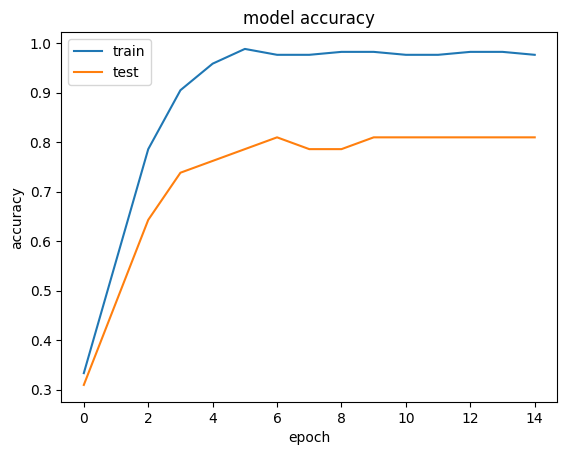

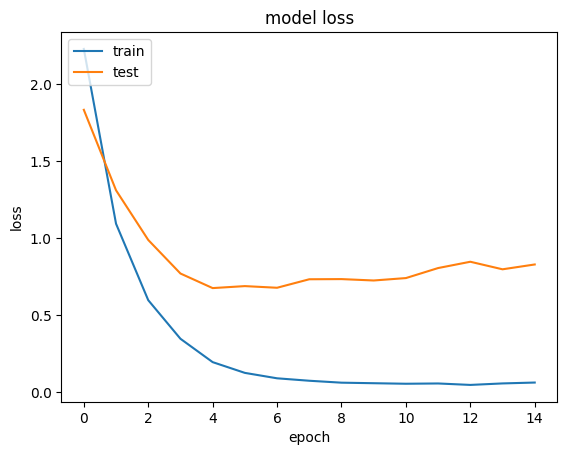

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()